# Aspect-Sentiment EDA (review_aspect_extractions)

This notebook explores aspect-level sentiment extracted from reviews, focusing on trends by offerings, destinations, and overall customer sentiment and aspects.

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 120)
import os
import sys
print('✓ Libraries ready')

✓ Libraries ready


In [2]:
aspect_df = pd.read_csv("../data/prepared_dataset.csv")

In [3]:
aspect_df.head()

,id,content,date,language,tags,title,ratings,normalized_ratings,raw_ratings,offer,destination,offer_2,destination_2,offer_3,destination_3,offer_4,destination_4,offer_5,destination_5,text_for_analysis,title_for_analysis,content_length,word_count,char_count,title_word_count,title_char_count,cleaned_text,tokens,token_count,year_month,id_numeric,text_id,aspect,evidence_span,polarity,confidence,model,latency_ms,aspect_normalized,evidence_len,month
0,377380-203583770957,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,2021-04-11 06:45:00+00:00,ara,"[{'value': 'c07bdfc8hb0r13sa7agg', 'sentiment': None}, {'value': 'c07bdfc8hb0r13sa7ah0', 'sentiment': None}]",Al Ahsa Mall by Arabian Centres,"{'normalized': 100, 'raw': 5}",100.0,5.0,Tourism Attractions/ Sites,Al Ahsa,Retail,Al Ahsa,NaN,NaN,NaN,NaN,NaN,NaN,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,Al Ahsa Mall by Arabian Centres,59,10,59,6,31,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,"['الاماكن', 'الهاديه', 'الجميله', 'الممتعه', 'التسوق', 'تحس', 'انك', 'بالخبر']",8,2021-04,203583770957,0,الاماكن,الاماكن,positive,0.9982,pyabsa-multilingual,49136.0,الاماكن,7.0,2021-04-01
1,377380-203583770957,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,2021-04-11 06:45:00+00:00,ara,"[{'value': 'c07bdfc8hb0r13sa7agg', 'sentiment': None}, {'value': 'c07bdfc8hb0r13sa7ah0', 'sentiment': None}]",Al Ahsa Mall by Arabian Centres,"{'normalized': 100, 'raw': 5}",100.0,5.0,Tourism Attractions/ Sites,Al Ahsa,Retail,Al Ahsa,NaN,NaN,NaN,NaN,NaN,NaN,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,Al Ahsa Mall by Arabian Centres,59,10,59,6,31,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,"['الاماكن', 'الهاديه', 'الجميله', 'الممتعه', 'التسوق', 'تحس', 'انك', 'بالخبر']",8,2021-04,203583770957,0,التسوق,التسوق,positive,0.9976,pyabsa-multilingual,49136.0,التسوق,6.0,2021-04-01
2,377380-203583770957,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,2021-04-11 06:45:00+00:00,ara,"[{'value': 'c07bdfc8hb0r13sa7agg', 'sentiment': None}, {'value': 'c07bdfc8hb0r13sa7ah0', 'sentiment': None}]",Al Ahsa Mall by Arabian Centres,"{'normalized': 100, 'raw': 5}",100.0,5.0,Tourism Attractions/ Sites,Al Ahsa,Retail,Al Ahsa,NaN,NaN,NaN,NaN,NaN,NaN,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,Al Ahsa Mall by Arabian Centres,59,10,59,6,31,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,"['الاماكن', 'الهاديه', 'الجميله', 'الممتعه', 'التسوق', 'تحس', 'انك', 'بالخبر']",8,2021-04,203583770957,0,للسباحه,للسباحه,positive,0.9987,pyabsa-multilingual,43433.0,للسباحه,7.0,2021-04-01
3,377380-203583770957,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,2021-04-11 06:45:00+00:00,ara,"[{'value': 'c07bdfc8hb0r13sa7agg', 'sentiment': None}, {'value': 'c07bdfc8hb0r13sa7ah0', 'sentiment': None}]",Al Ahsa Mall by Arabian Centres,"{'normalized': 100, 'raw': 5}",100.0,5.0,Tourism Attractions/ Sites,Al Ahsa,Retail,Al Ahsa,NaN,NaN,NaN,NaN,NaN,NaN,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,Al Ahsa Mall by Arabian Centres,59,10,59,6,31,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,"['الاماكن', 'الهاديه', 'الجميله', 'الممتعه', 'التسوق', 'تحس', 'انك', 'بالخبر']",8,2021-04,203583770957,0,سعره,سعره,neutral,0.7243,pyabsa-multilingual,43845.0,سعره,4.0,2021-04-01
4,377380-203583770957,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,2021-04-11 06:45:00+00:00,ara,"[{'value': 'c07bdfc8hb0r13sa7agg', 'sentiment': None}, {'value': 'c07bdfc8hb0r13sa7ah0', 'sentiment': None}]",Al Ahsa Mall by Arabian Centres,"{'normalized': 100, 'raw': 5}",100.0,5.0,Tourism Attractions/ Sites,Al Ahsa,Retail,Al Ahsa,NaN,NaN,NaN,NaN,NaN,NaN,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,Al Ahsa Mall by Arabian Centres,59,10,59,6,31,من الاماكن الهاديه الجميله الممتعه في التسوق تحس انك بالخبر,"['الاماكن', 'الهاديه', 'الجميله', 'الممتعه', 'التسوق', 'تحس', 'انك', 'بالخبر']",8,2021-04,203583770957,0,seafront,seafront,p

## Aspect normalization
Consolidate similar aspects (plural/singular, case variations, etc.) to reduce duplication and improve analysis clarity.

In [4]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../')))

In [5]:
from src.post_analysis.normalize_aspect import print_aspect_analysis

✓ Libraries ready


In [6]:
print_aspect_analysis(aspect_df)

'مكان' (n=690): مكان

'place' (n=546): PLACE, Place, place, places
'فندق' (n=315): فندق
'المكان' (n=312): المكان
'الفندق' (n=140): الفندق

'food' (n=123): Food, food, foods
'منتزه' (n=114): منتزه

'service' (n=110): Service, Services, service, services

'staff' (n=108): Staff, Staffs, staff, staffs
'موقع' (n=92): موقع
'حديقة' (n=90): حديقة
'الاستقبال' (n=90): الاستقبال

'price' (n=87): Price, Prices, price, prices
'الخدمات' (n=84): الخدمات

'park' (n=83): Park, Parks, park
'مطعم' (n=81): مطعم
'الحرم' (n=74): الحرم
'خدمات' (n=71): خدمات
'السعر' (n=68): السعر
'الموقع' (n=67): الموقع

Missingness (top 10):
 destination_5    0.988335
offer_5          0.988335
offer_4          0.984508
destination_4    0.984508
offer_3          0.957075
destination_3    0.957075
offer_2          0.760616
destination_2    0.760616
evidence_span    0.456453
latency_ms       0.456453
dtype: float64

Distinct counts:
- aspect: 3434
- destination: 22
- offer: 5
- polarity: 3
- model: 1


## Polarity distribution and top aspects

In [7]:
from src.post_analysis.aspects_analyzer import AspectVisualization

In [8]:
aspect_analyzer = AspectVisualization(aspect_df)

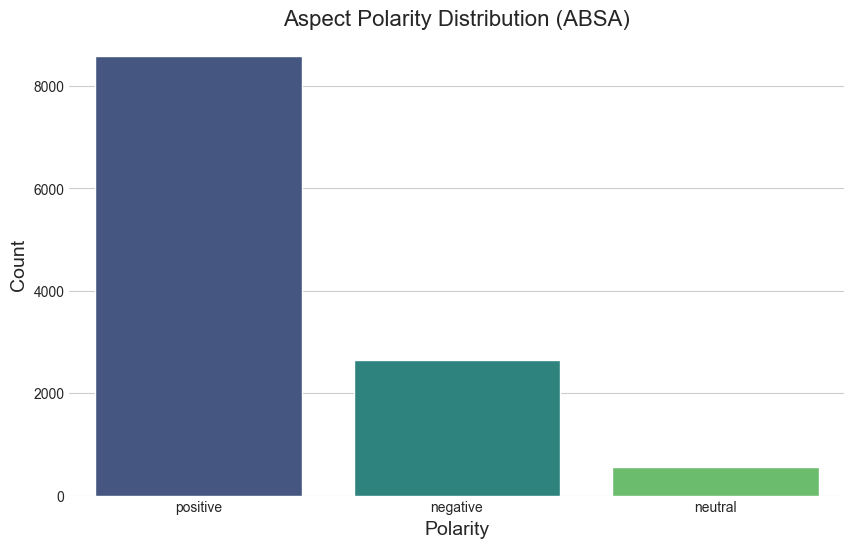

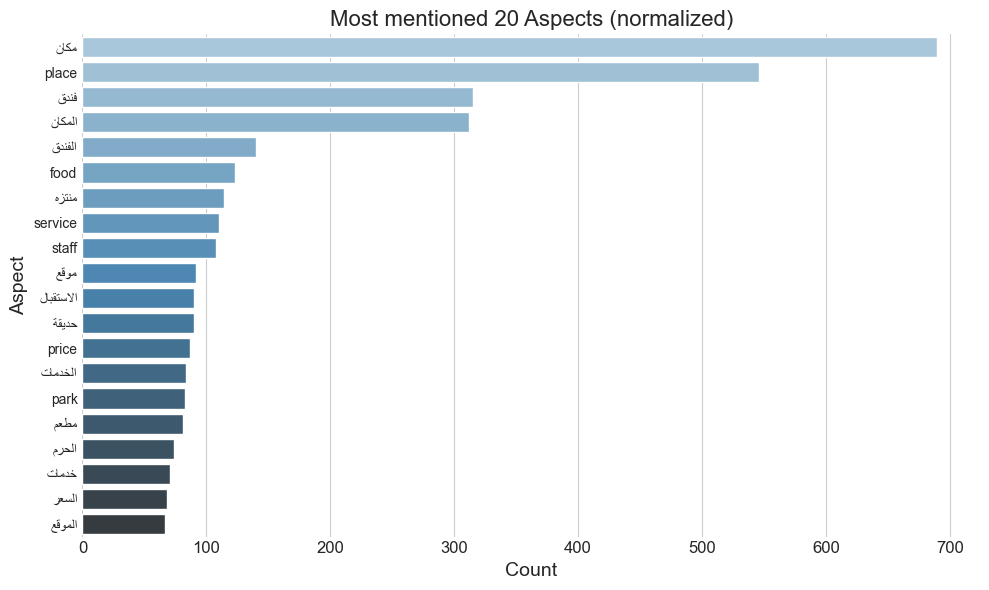

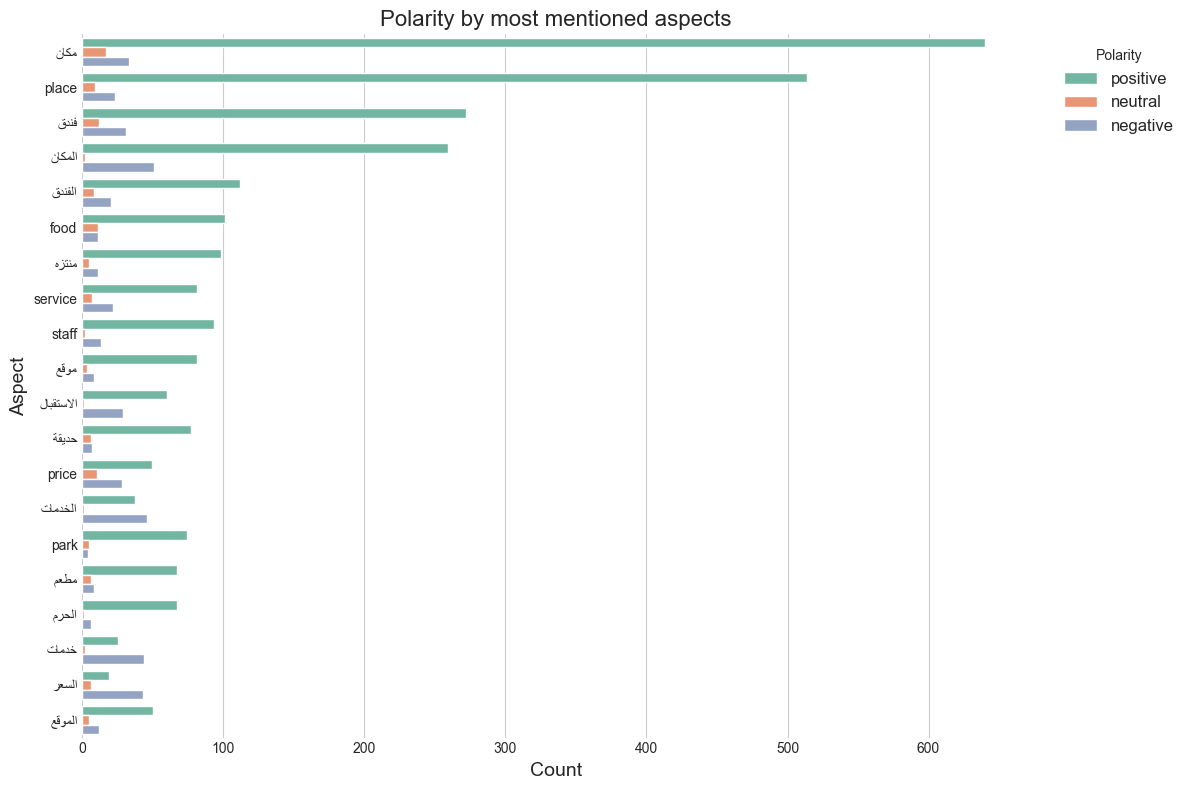

In [9]:
aspect_analyzer.plot_all()

# Offering and destination breakdowns


In [10]:
from src.post_analysis.aspects_visualizer import AspectAnalysisself

In [11]:
aspect_viz = AspectAnalysisself(aspect_df)

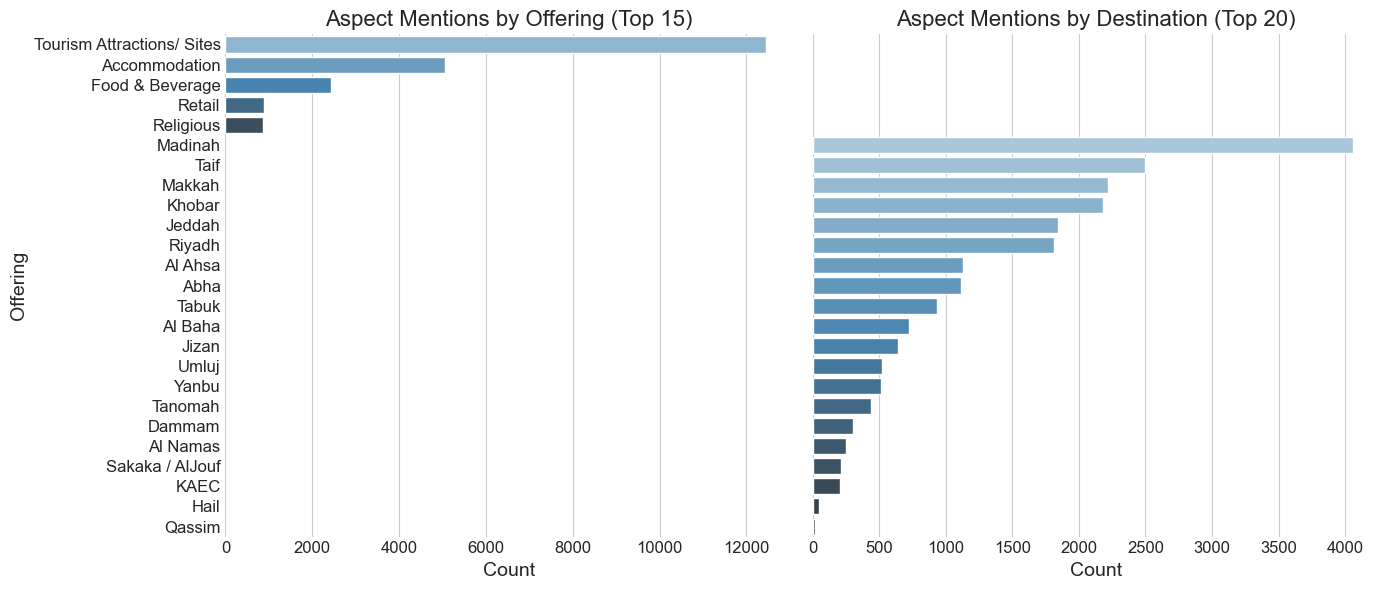

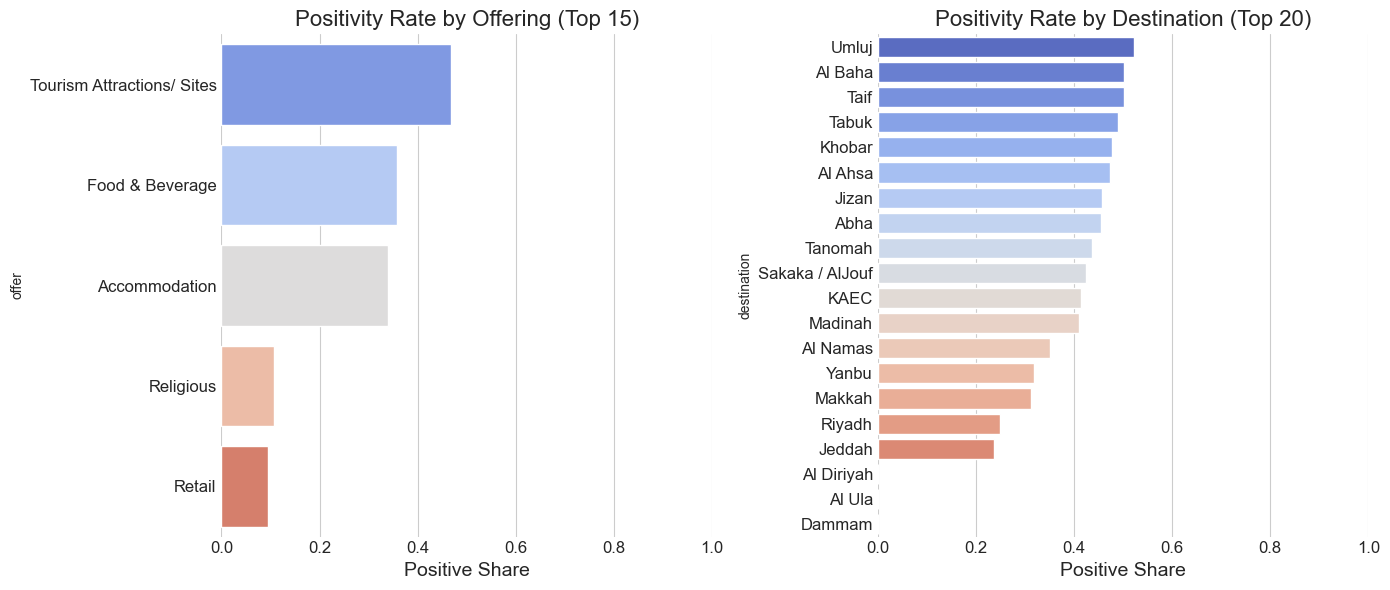

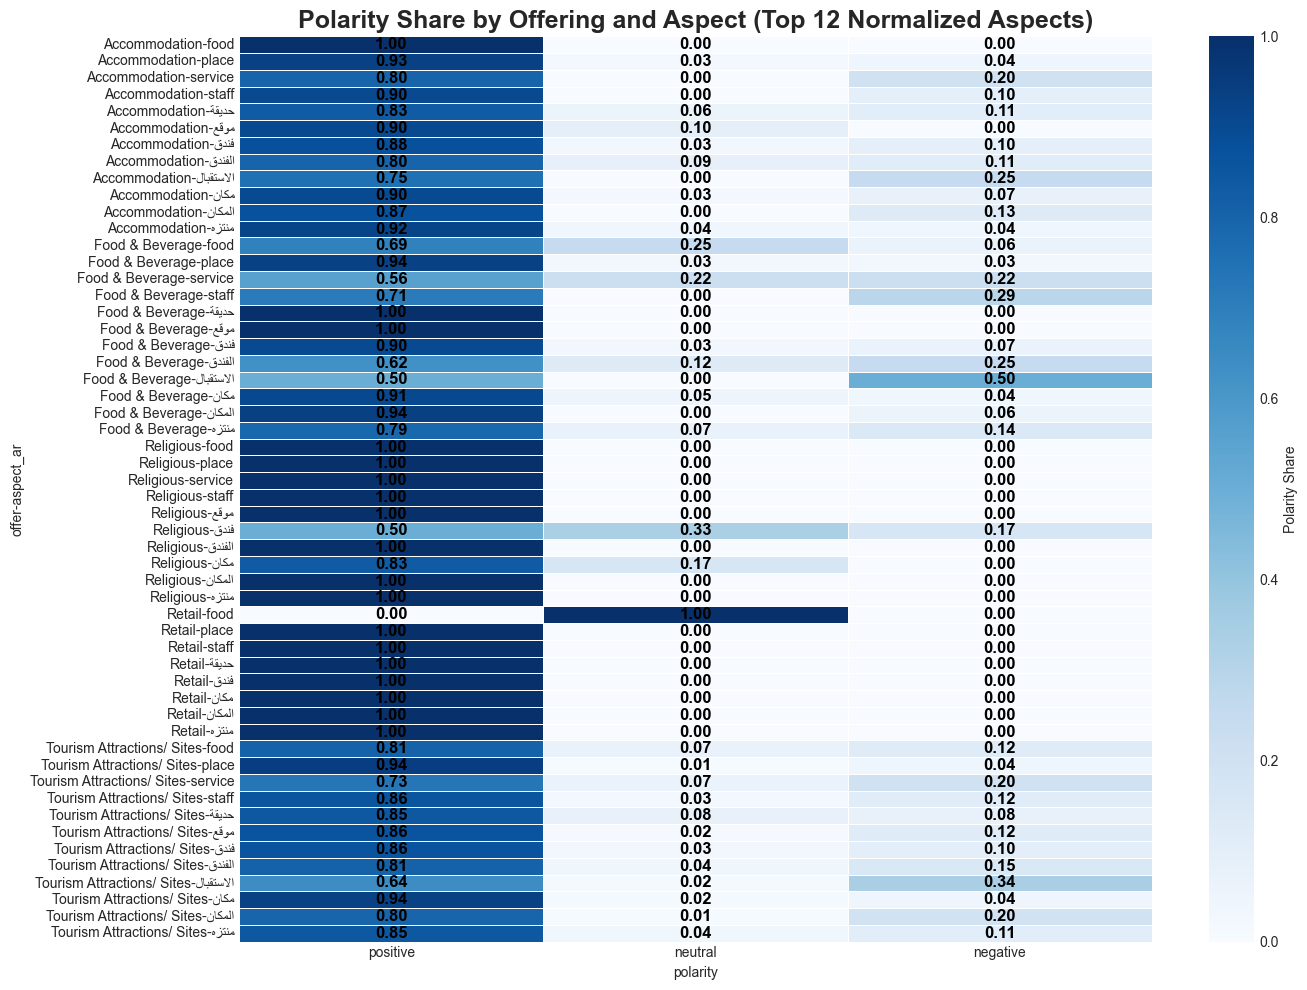

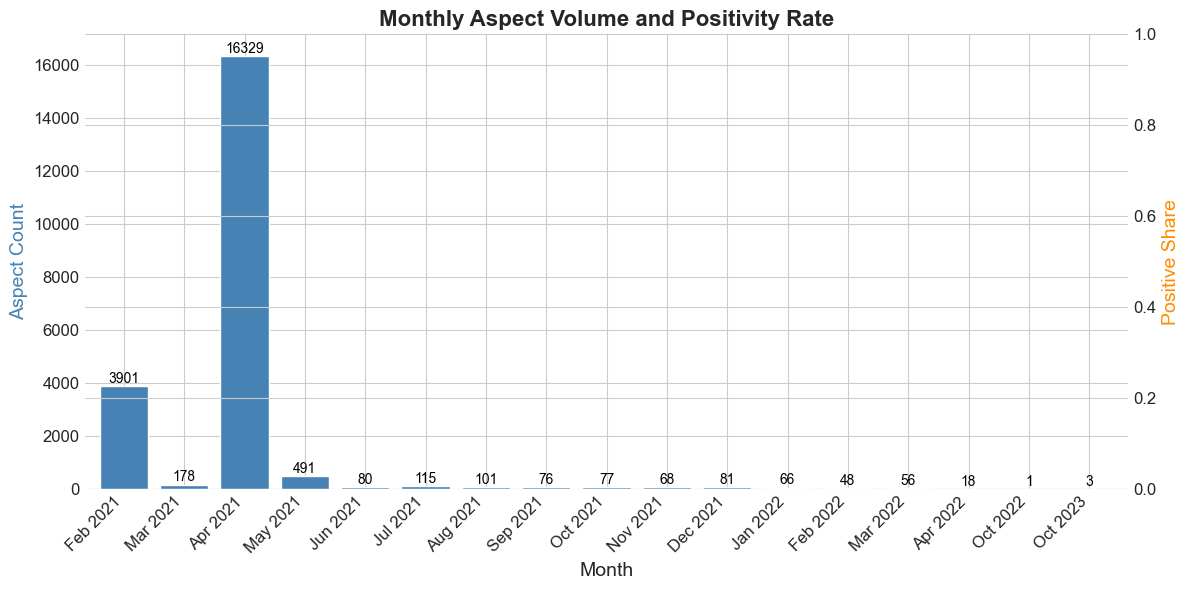

In [12]:
aspect_viz.plot_all()

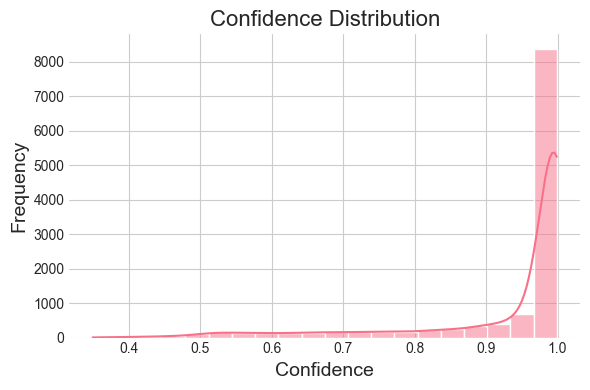

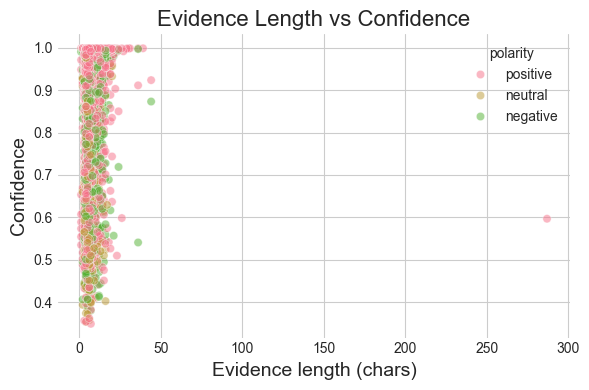

In [13]:
from src.post_analysis.confidence_viz import ConfidenceEvidenceVisualizer

    # Create an instance of the new visualization class
visualizer = ConfidenceEvidenceVisualizer(aspect_df)
visualizer.plot_all()

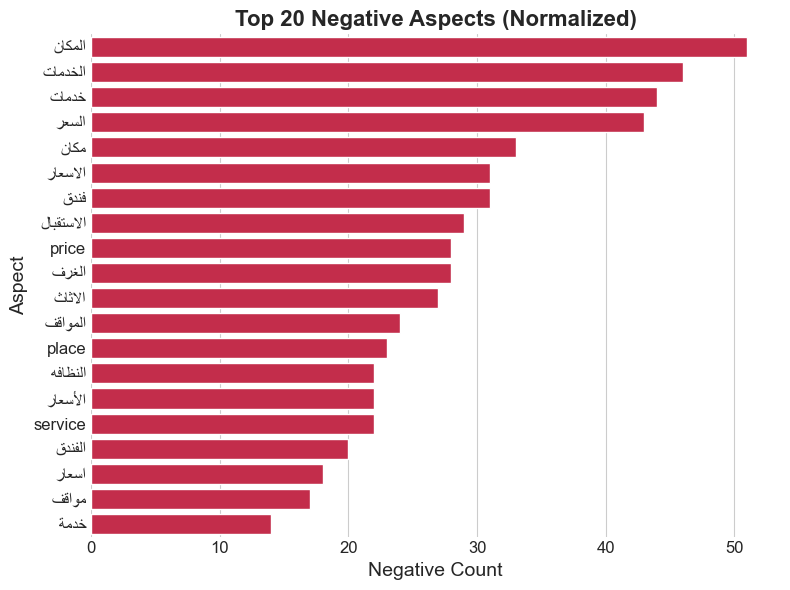

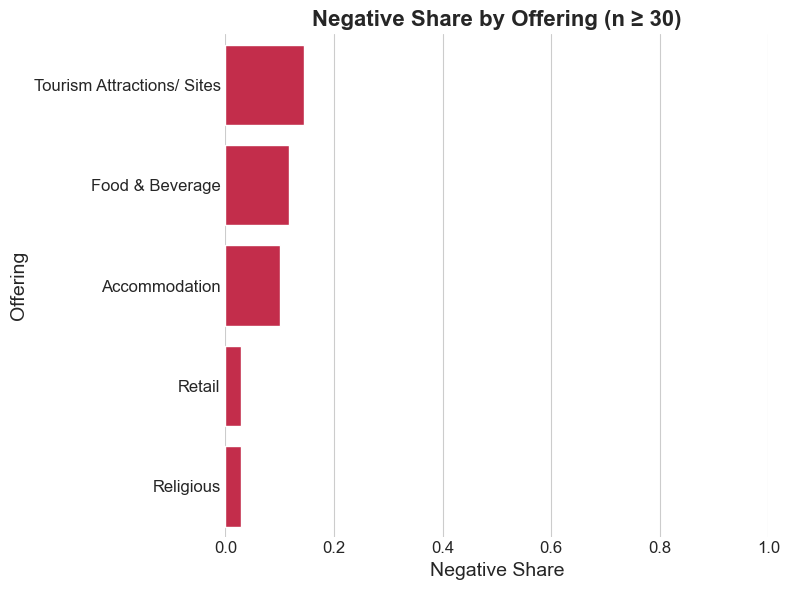

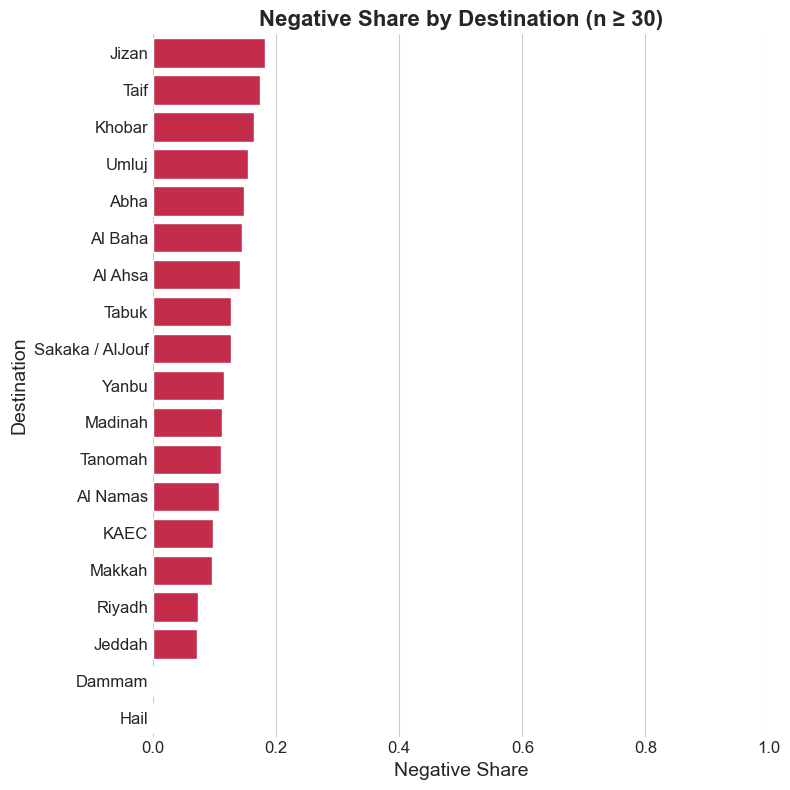

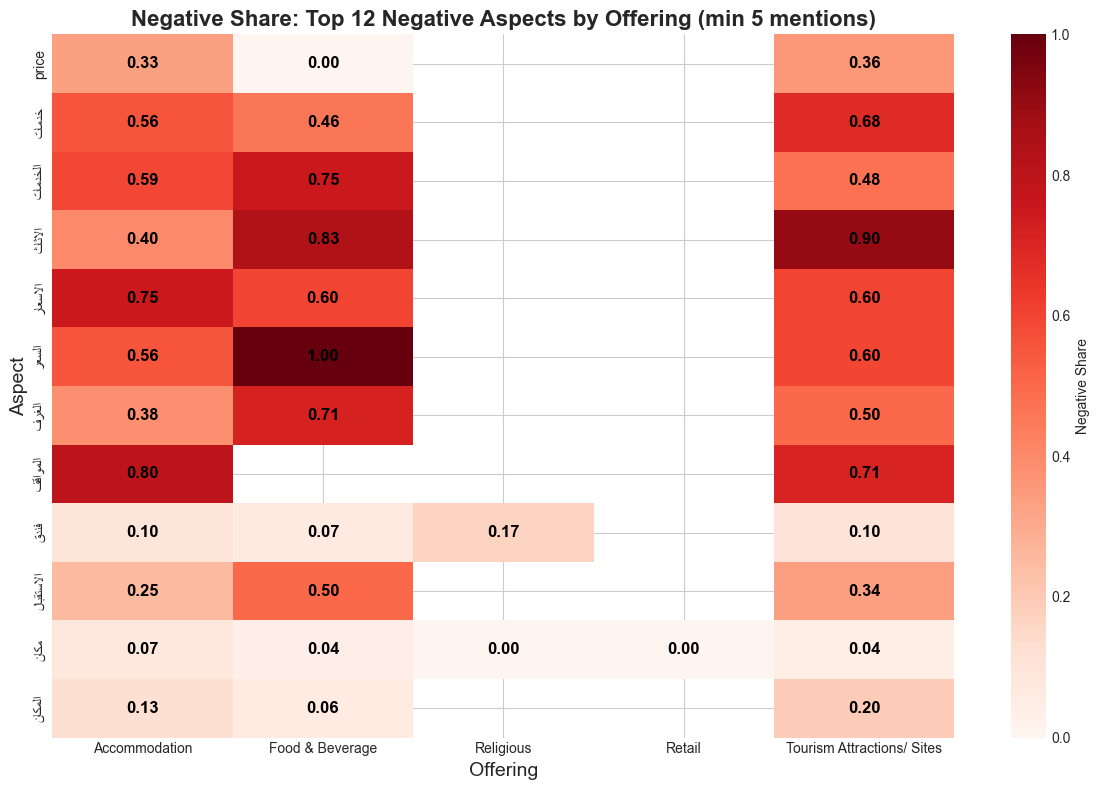

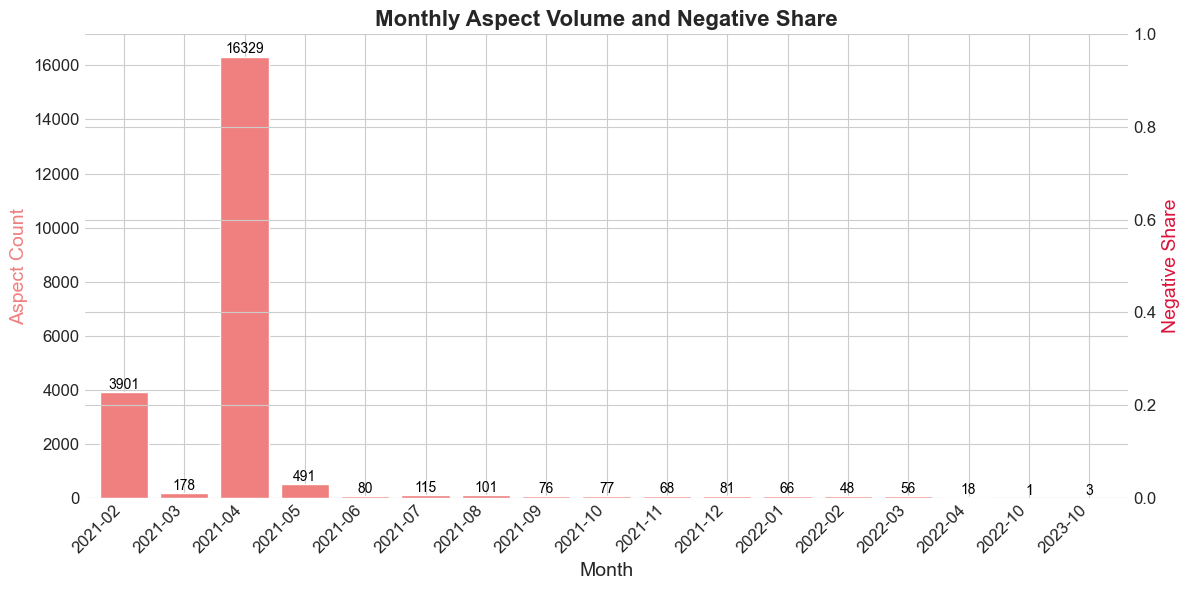

Top negative aspects: المكان, الخدمات, خدمات, السعر, مكان
Offerings with highest negative share (n≥30): Tourism Attractions/ Sites (14.4%), Food & Beverage (11.8%), Accommodation (10.0%), Retail (3.0%), Religious (2.9%)
Destinations with highest negative share (n≥30): Jizan (18.2%), Taif (17.4%), Khobar (16.4%), Umluj (15.5%), Abha (14.8%)


In [14]:
from src.post_analysis.negative_ana import NegativeAnalysisVisualizer

    # Create an instance of the new visualization class
visualizer = NegativeAnalysisVisualizer(aspect_df)
visualizer.plot_all()